In [ ]:
# Introduction

In [88]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Download the data
http://mindbigdata.com/opendb/index.html

In [7]:
%%bash
wget -q http://mindbigdata.com/opendb/MindBigData-IN-v1.06.zip
mkdir -p DATA
unzip -qq MindBigData-IN-v1.06.zip
mv IN.txt DATA/
rm MindBigData-IN-v1.06.zip

In [ ]:
# Load and clean data

In [8]:
PATH_DATA="DATA/IN.txt"

with open(PATH_DATA,'r') as f:
    print(f.readline())

1142043	173652	IN	AF3	0	256	4259.487179,4237.948717,4247.179487,4242.051282,4233.333333,4251.282051,4232.820512,4234.358974,4224.615384,4219.487179,4249.743589,4238.461538,4245.641025,4244.615384,4223.076923,4240.512820,4234.358974,4240.512820,4235.384615,4224.102564,4255.384615,4243.589743,4243.589743,4248.205128,4226.666666,4244.102564,4228.717948,4225.641025,4236.923076,4208.717948,4226.153846,4234.871794,4234.871794,4245.641025,4233.846153,4263.076923,4261.025641,4244.615384,4261.025641,4242.051282,4243.589743,4233.333333,4221.025641,4241.538461,4235.384615,4250.256410,4235.897435,4221.538461,4268.717948,4257.435897,4238.974358,4232.307692,4218.461538,4244.615384,4236.410256,4235.384615,4246.666666,4238.461538,4252.820512,4234.358974,4232.820512,4247.692307,4234.871794,4260.000000,4249.230769,4233.846153,4251.282051,4249.230769,4272.820512,4265.128205,4256.410256,4265.641025,4233.333333,4253.846153,4256.923076,4238.461538,4265.641025,4256.923076,4254.871794,4251.794871,4244.615384,

In [21]:
df=pd.read_csv(PATH_DATA,delimiter="\t",header=None,names=["id","event","device","channel","code","size","data"])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65250 entries, 0 to 65249
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       65250 non-null  int64 
 1   event    65250 non-null  int64 
 2   device   65250 non-null  object
 3   channel  65250 non-null  object
 4   code     65250 non-null  int64 
 5   size     65250 non-null  int64 
 6   data     65250 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.5+ MB
None


,id,event,device,channel,code,size,data
0,1142043,173652,IN,AF3,0,256,"4259.487179,4237.948717,4247.179487,4242.05128..."
1,1142044,173652,IN,AF4,0,256,"4103.076923,4100.512820,4102.564102,4087.69230..."
2,1142045,173652,IN,T7,0,256,"4245.128205,4218.461538,4242.051282,4245.12820..."
3,1142046,173652,IN,T8,0,256,"4208.717948,4188.717948,4204.102564,4198.46153..."
4,1142047,173652,IN,PZ,0,256,"4189.230769,4203.589743,4188.717948,4186.66666..."


In [23]:
df.id.nunique()

65250

In [24]:
df.event.nunique()

13050

In [26]:
df.channel.nunique()

5

<AxesSubplot:>

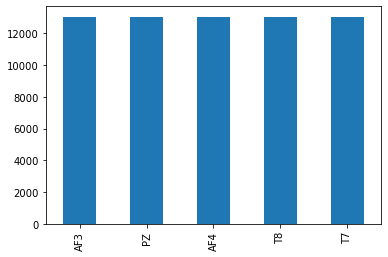

In [32]:
df.channel.value_counts().plot.bar()

In [30]:
df.code.nunique()

10

<AxesSubplot:>

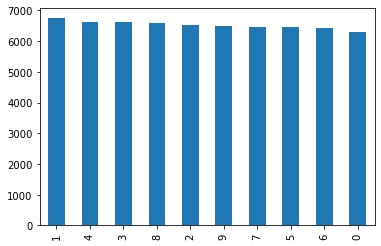

In [31]:
df.code.value_counts().plot.bar()

In [50]:
df["size"].mean()

244.13532567049808

In [51]:
df["size"].std()

31.935014214264896

### Dealing with the data values

In [36]:
df.data=df.data.apply(lambda x: [float(i) for i in x.split(",")])

In [39]:
df.data.apply(np.mean).agg(["mean","std"])

mean    4276.380742
std       37.388607
Name: data, dtype: float64

In [40]:
df.data.apply(np.std).agg(["mean","std"])

mean    19.463488
std     24.060789
Name: data, dtype: float64

In [45]:
event_id=173652
df.query(f"event=={event_id}")

,id,event,device,channel,code,size,data
0,1142043,173652,IN,AF3,0,256,"[4259.487179, 4237.948717, 4247.179487, 4242.0..."
1,1142044,173652,IN,AF4,0,256,"[4103.076923, 4100.51282, 4102.564102, 4087.69..."
2,1142045,173652,IN,T7,0,256,"[4245.128205, 4218.461538, 4242.051282, 4245.1..."
3,1142046,173652,IN,T8,0,256,"[4208.717948, 4188.717948, 4204.102564, 4198.4..."
4,1142047,173652,IN,PZ,0,256,"[4189.230769, 4203.589743, 4188.717948, 4186.6..."


In [64]:
# generate times column
df["time"]=df.apply(lambda row: list(np.arange(0,2,1/row.size)),axis=1)

In [83]:
def plot_event(event_id):
    df_aux=df.query(f"event=={event_id}")
    df_plot=pd.DataFrame(dict(zip(df_aux["channel"],df_aux["data"])))
    plt.figure(figsize=(10,10))
    sns.lineplot(data=df_plot)
    plt.title(f"Event: {df_aux.iloc[0].event} - Digit: {df_aux.iloc[0].code}")

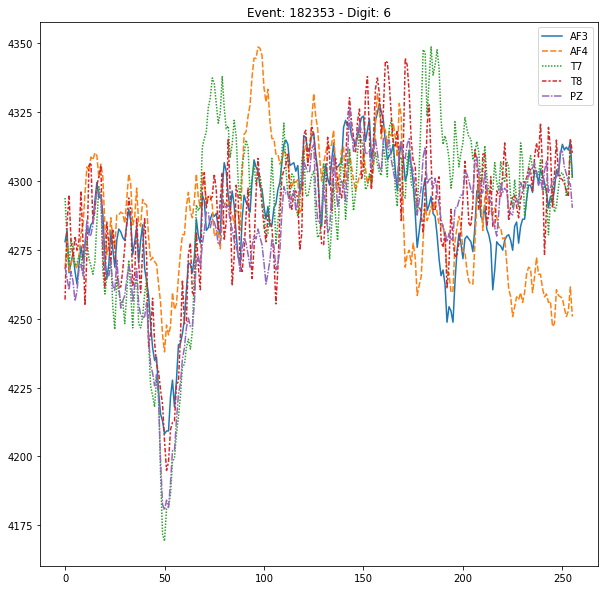

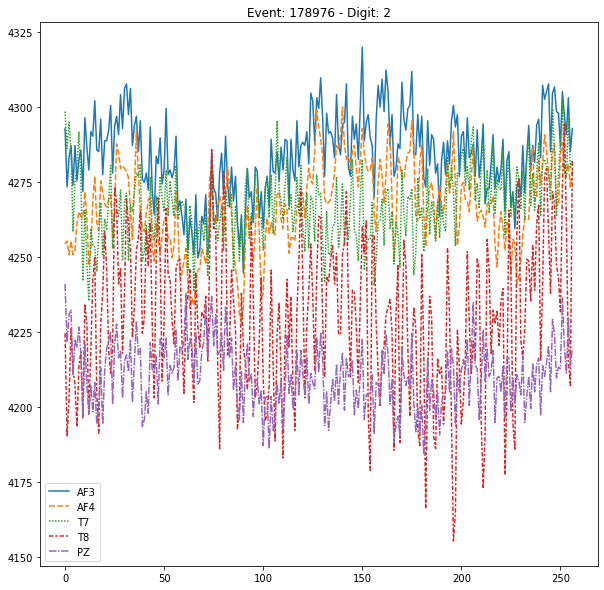

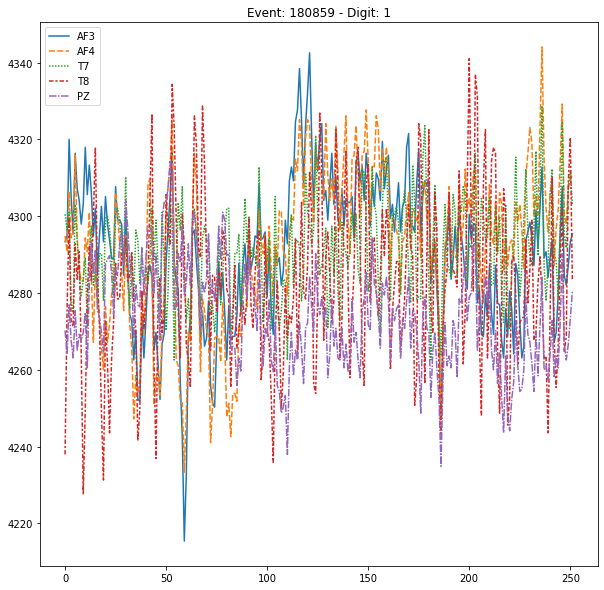

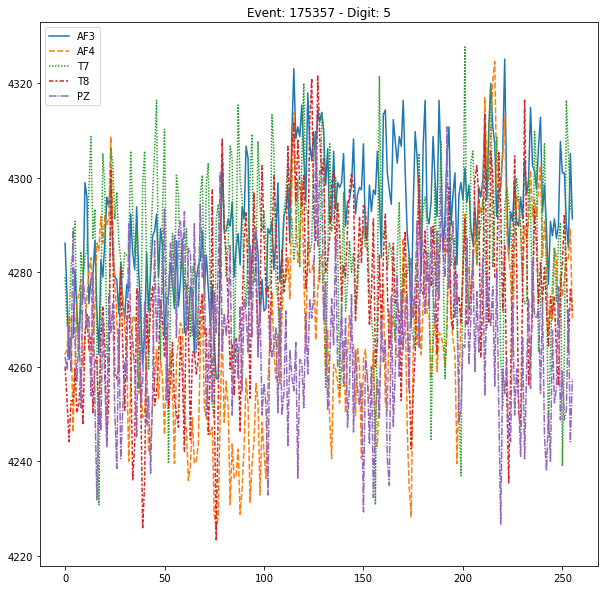

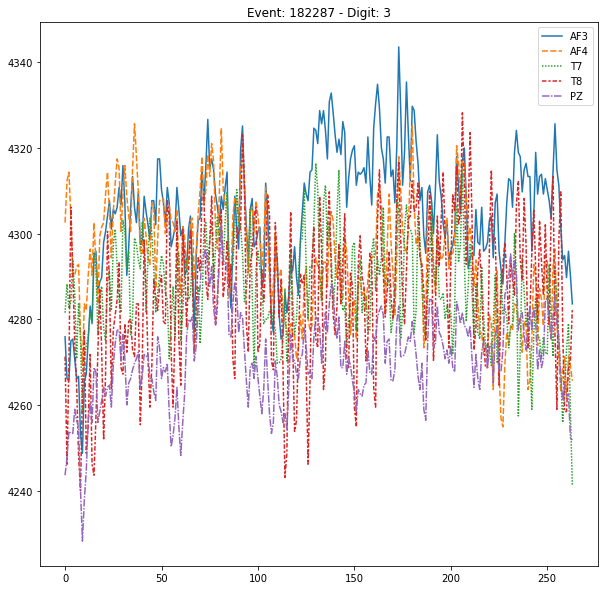

In [91]:
for ev_id in random.sample(df.event.unique().tolist(),5):
    plot_event(ev_id)